## 정규 분포 코드 작성

In [1]:
import numpy as np

In [2]:
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return y

- 정규분포의 pdf를 출력하는 함수이다.

- $$ X \sim N(0, 1) $$

- $$ p(x) = \frac{1}{\sqrt{2\pi \sigma}} exp(-\frac{(x - \mu)^2}{2 \sigma ^ 2}) $$

- pdf는 cdf의 미분이기 때문에, 그 값이 1보다 클 수 있다는 점에도 주의해야한다.

## 시각화~

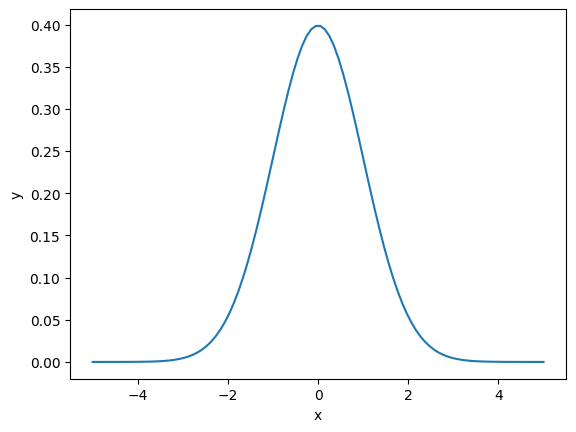

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y = normal(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter01\\result_image\\normal.png')
plt.show()


## 매개변수 바꿔보기

- 평균 바꿔보기

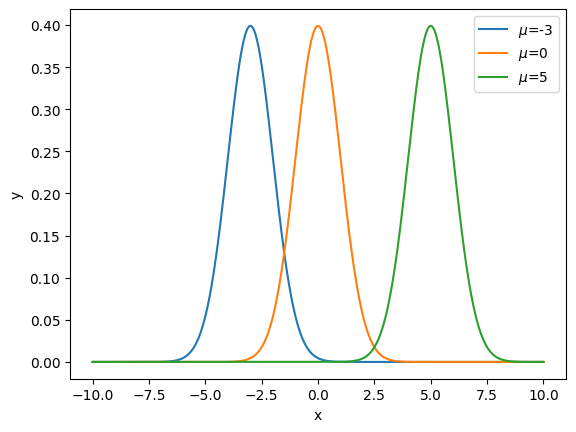

In [4]:
import warnings
warnings.filterwarnings('ignore')

x = np.linspace(-10,10, 1000)

y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.clf()
plt.plot(x, y0, label='$\\mu$=-3')
plt.plot(x, y1, label='$\\mu$=0')
plt.plot(x, y2, label='$\\mu$=5')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter01\\result_image\\normal_mu.png')
plt.show()

- 표준편차 바꿔보기

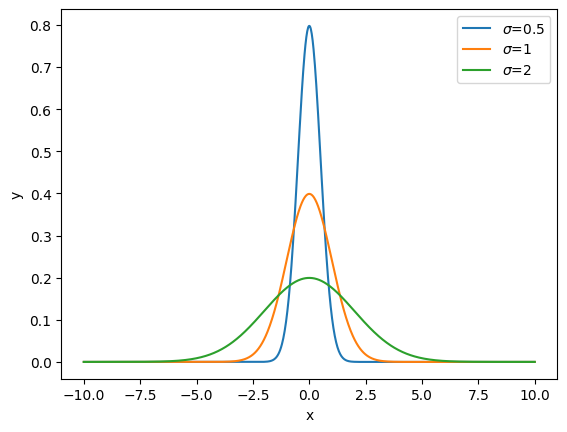

In [5]:
y0 = normal(x, mu=0, sigma=0.5)
y1 = normal(x, mu=0, sigma=1)
y2 = normal(x, mu=0, sigma=2)

plt.clf()
plt.plot(x, y0, label='$\\sigma$=0.5')
plt.plot(x, y1, label='$\\sigma$=1')
plt.plot(x, y2, label='$\\sigma$=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter01\\result_image\\normal_sigma.png')
plt.show()

## Central Limit Theorem

 - `p(x)` 의 확률 분포가 무엇이든지 관계 없이, 그 표본평균의 분포는 반드시 정규분포에 수렴하고 분산은 p(x)의 분산의 1/N배가 됨

### 1개의 dataset을 만드는 code

In [6]:
import numpy as np

N = 3
xs = []
for n in range(N):
    x = np.random.randn() # uniform distribution
    xs.append(x)

x_mean = np.mean(xs)
x_mean

np.float64(1.3188784939999916)

### 10000개의 dataset에 대해서 실험!

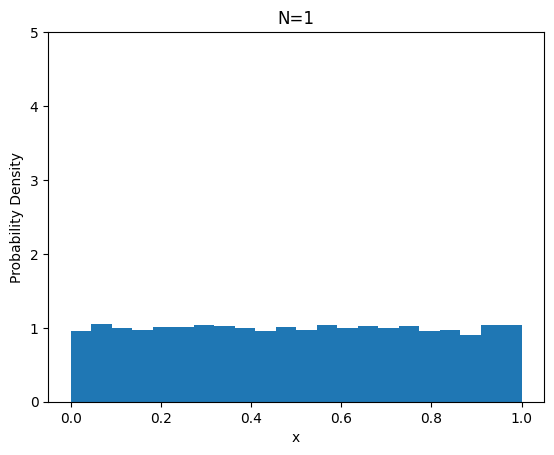

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def get_sample_distr(num_samples_per_dataset=1, iterations=10000):
    x_means = []
    N = num_samples_per_dataset

    for _ in range(iterations):
        xs = []
        for n in range(N):
            x = np.random.rand()
            xs.append(x)
        mean = np.mean(xs)
        x_means.append(mean)
    return x_means

x_means = get_sample_distr()
plt.hist(x_means, bins="auto", density=True)
plt.title(f"N=1")
plt.xlabel('x')
plt.ylabel("Probability Density")
plt.xlim(-0.05, 1.05)
plt.ylim(0, 5)
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter01\\result_image\\central_limit_theorem.png')
plt.show()


- N=1 이면, 그냥 Uniform distr에서 뽑은 거니까..

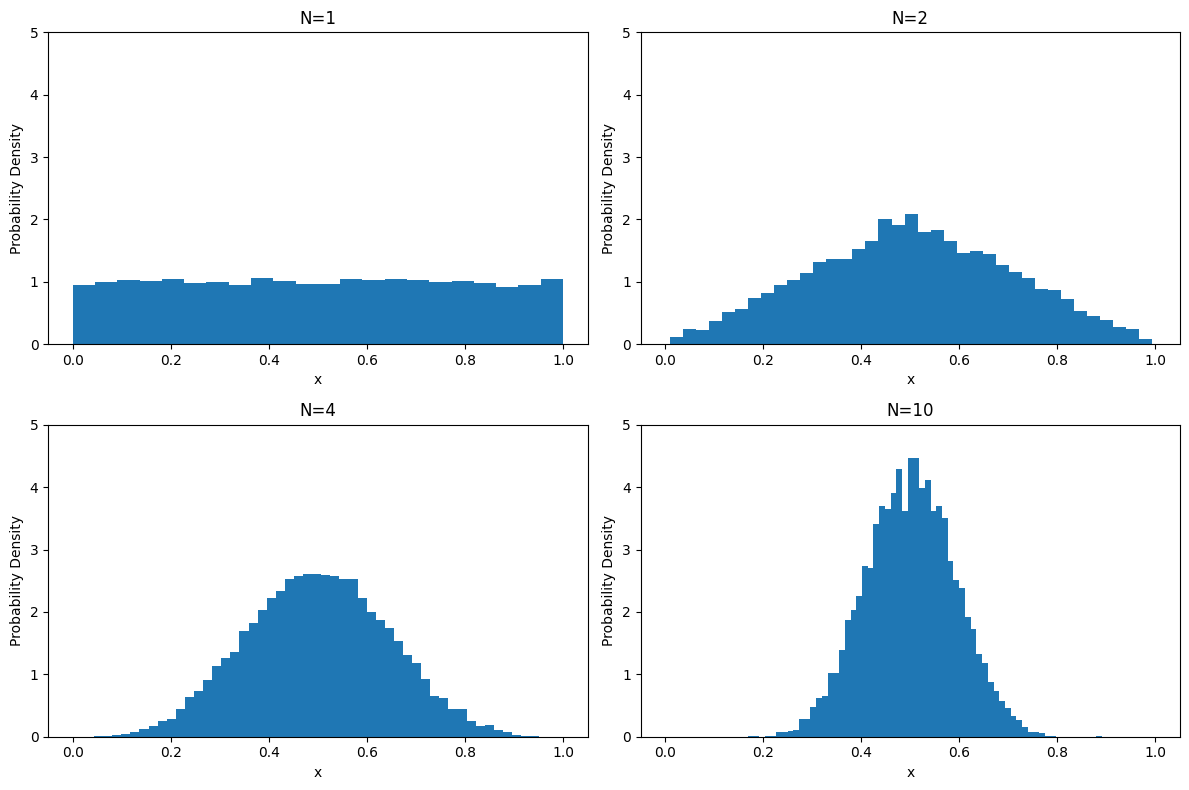

In [8]:
NS = [1, 2, 4, 10]

plt.figure(figsize=(12, 8))
for i, N in enumerate(NS):
    x_means = get_sample_distr(num_samples_per_dataset=N)
    plt.subplot(2, 2, i+1)
    plt.hist(x_means, bins="auto", density=True)
    plt.title(f"N={N}")
    plt.xlabel('x')
    plt.ylabel("Probability Density")
    plt.xlim(-0.05, 1.05)
    plt.ylim(0, 5)
plt.tight_layout()
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter01\\result_image\\central_limit_theorem2.png')
plt.show()


- 하나의 데이터 셋을 구성하는 표본의 개수가 N개일때 -> N이 커질수록... `X_bar ~ (mu, sigma ** 2 / N)`에 수렴, where `X ~ E[X] = mu and  VAR[X] = sigma ** 2`

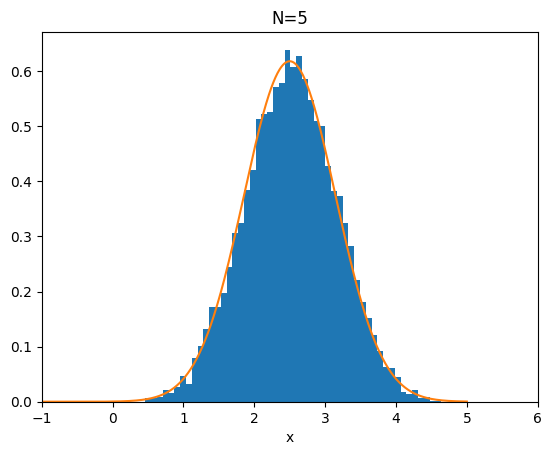

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def get_sample_distr_sum(num_samples_per_dataset=1, iterations=10000):
    x_means = []
    N = num_samples_per_dataset

    for _ in range(iterations):
        xs = []
        for n in range(N):
            x = np.random.rand()
            xs.append(x)
        x_means.append(np.sum(xs))
    return x_means

N = 5
x_norm = np.linspace(-5, 5, 1000)
mu = N / 2
sigma = np.sqrt(N / 12)
y_norm = normal(x_norm, mu=mu, sigma=sigma)
x_sums = get_sample_distr_sum(num_samples_per_dataset=N)

plt.hist(x_sums, bins="auto", density=True)
plt.plot(x_norm, y_norm)
plt.title(f"N={N}")
plt.xlabel('x')
plt.xlim(-1, 6)
plt.savefig('C:\\Users\\blue2\\OneDrive\\문서\\DLFromScratch5\\Chapter01\\result_image\\central_limit_theorem_sum.png')
plt.show()


- 표본합의 분포는 `N * E[X], N * sigma ** 2`에 수렴함